### Por que usar XGBoost em vez do GBM clássico?

Nesta prática, implementamos o **XGBoost**, que se diferencia do GBM por três pilares:

1. **Regularização L1 (Lasso) e L2 (Ridge):** Ele penaliza modelos complexos nativamente, o que reduz drasticamente o overfitting.
2. **Processamento em Paralelo:** O XGBoost não constrói árvores em paralelo (pois é Boosting), mas ele **paraleliza a busca pelos pontos de corte** (split) dentro de cada árvore, sendo muito mais rápido.
3. **Tratamento de Missing Values:** O algoritmo aprende automaticamente a melhor direção para seguir quando encontra um dado nulo (`NaN`).

**Métricas avaliadas:**
* **Precision:** De todos que o modelo classificou como positivo, quantos eram reais?
* **Recall:** De todos os casos positivos reais, quantos o modelo conseguiu capturar?
* **F1-Score:** A média harmônica entre os dois acima.

In [5]:
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Carregando dados (Exemplo de Classificação: Câncer de Mama)
data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo XGBoost
# objective='binary:logistic' é usado para classificação binária
model_xgb = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Treinamento
model_xgb.fit(X_train, y_train)

#Predição
y_pred = model_xgb.predict(X_test)
print(f"Acurácia Inicial XGBoost: {accuracy_score(y_test, y_pred):.2%}")

Acurácia Inicial XGBoost: 95.61%


C:\Users\renna\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:05:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [7]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'colsample_bytree': [0.7, 1.0], # Fração de colunas para cada árvore
    'subsample': [0.8, 1.0]
}

grid_xgb = GridSearchCV(
    estimator=model_xgb,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

grid_xgb.fit(X_train, y_train)
print(f"Melhores Parâmetros: {grid_xgb.best_params_}")

C:\Users\renna\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:17:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Melhores Parâmetros: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}


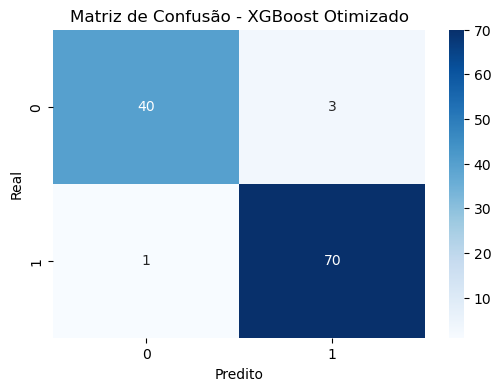

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

melhor_modelo = grid_xgb.best_estimator_
y_pred_final = melhor_modelo.predict(X_test)

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred_final)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão - XGBoost Otimizado')
plt.show()

# Relatório Completo
print(classification_report(y_test, y_pred_final))

---------